In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#its a regression model

In [31]:
df=pd.read_csv("car data.csv")

In [32]:
df.head() #printing first 5 rows and columns of dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [33]:
 df.shape #rows and columns of dataset

(301, 9)

In [58]:
print(df["Seller_Type"].unique(),df["Transmission"].unique(),df["Owner"].unique())   #unique values in categorical features
print(df["Fuel_Type"].unique())

['Dealer' 'Individual'] ['Manual' 'Automatic'] [0 1 3]
['Petrol' 'Diesel' 'CNG']


In [14]:
#checking null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [15]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [16]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [34]:
final_dataset=df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', #creating new data set by removing carname
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [21]:
final_dataset

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [51]:
final_dataset["current_year"]=2021

In [48]:
final_dataset["no_years"]=final_dataset["current_year"]-final_dataset["Year"] #creating a new feature with no of years 

In [45]:
final_dataset

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,5
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,6
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,12
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,4


In [44]:
final_dataset.drop(["Year"],axis=1) #dropping unusable features year

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,5
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,6
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,12
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,4


In [52]:
final_dataset.drop(["current_year"],axis=1,inplace=True) #the operations will happen  permanently  by writing inplace

In [42]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [62]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True) #get dummies is a pandas method for  converting categorical features to be one hot encoded
#one hot encoded is use to convert the categorical data to 0,1
#dropfirst method is used to drop first categorical value to not get in dummy trap

In [55]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,7,0,1,0,1
1,2013,4.75,9.54,43000,0,8,1,0,0,1
2,2017,7.25,9.85,6900,0,4,0,1,0,1
3,2011,2.85,4.15,5200,0,10,0,1,0,1
4,2014,4.60,6.87,42450,0,7,1,0,0,1


In [64]:
final_dataset.corr() #correlation function gives correlation between the features

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104,-1.000000,0.064315,-0.059959,-0.039896,0.000394
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_years,-1.000000,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.064315,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.059959,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.039896,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,0.000394,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [65]:
import seaborn as sns

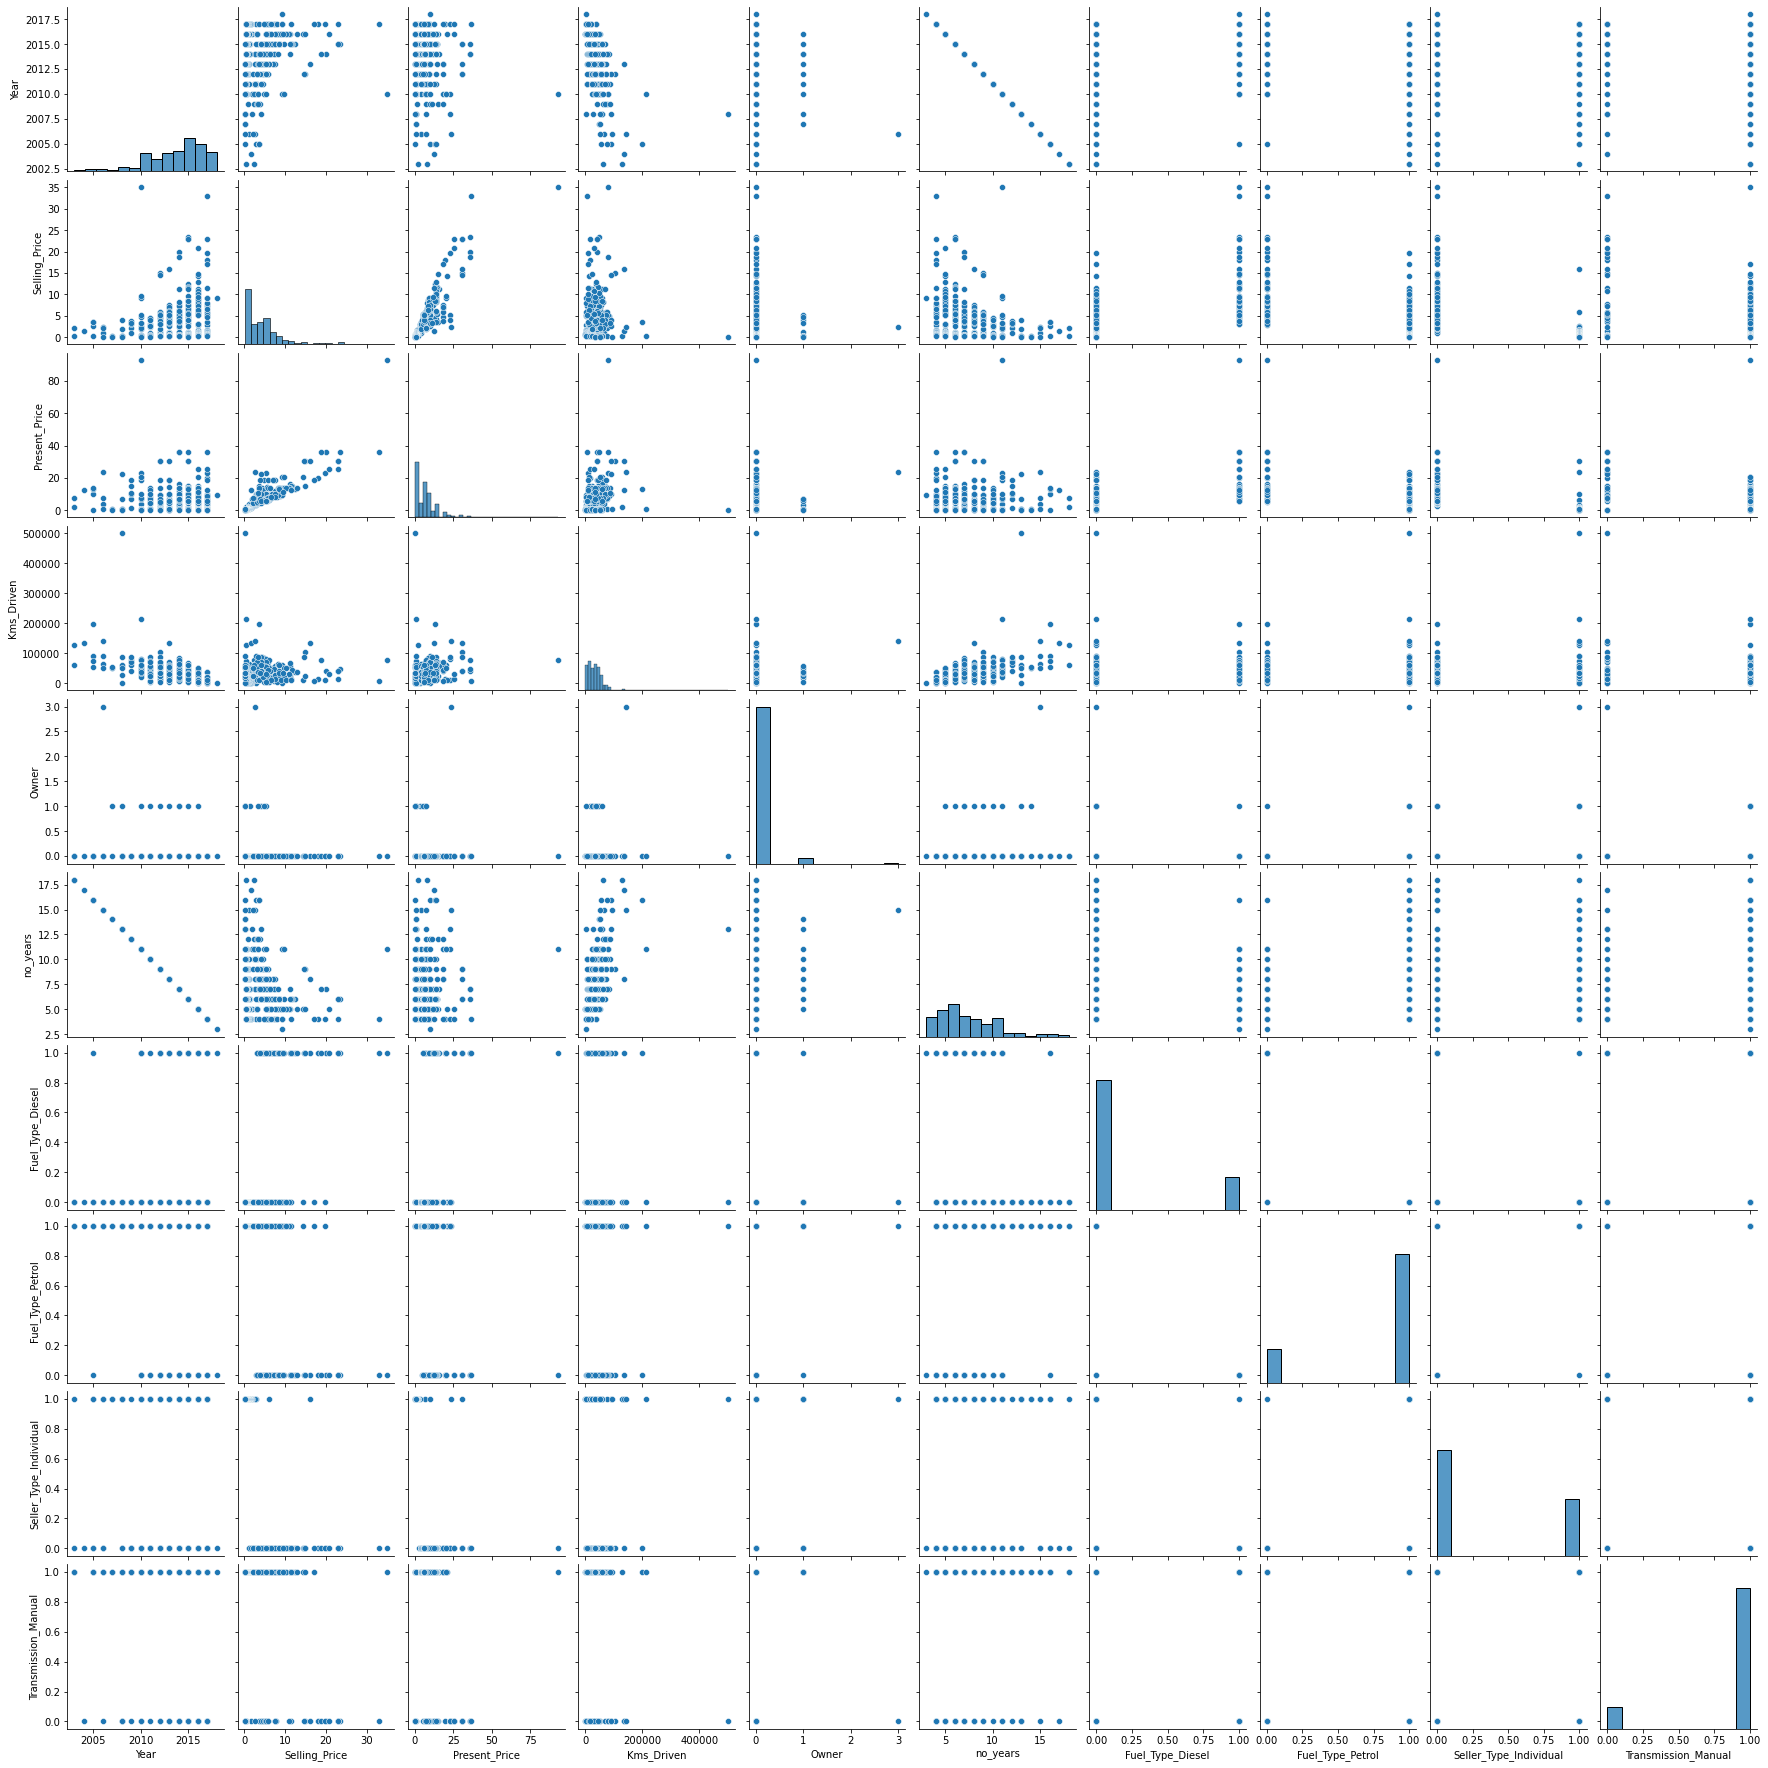

In [70]:
sns.pairplot(final_dataset)  #pairplot gives the plot of all feature in dataset


In [85]:
final_dataset.head()


,Year,Selling_Price,Present_Price,Kms_Driven,Owner,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,7,0,1,0,1
1,2013,4.75,9.54,43000,0,8,1,0,0,1
2,2017,7.25,9.85,6900,0,4,0,1,0,1
3,2011,2.85,4.15,5200,0,10,0,1,0,1
4,2014,4.60,6.87,42450,0,7,1,0,0,1


In [89]:
final_dataset.drop("Year",axis=1,inplace=True)

SyntaxError: invalid syntax (<ipython-input-91-86473ce5d030>, line 1)

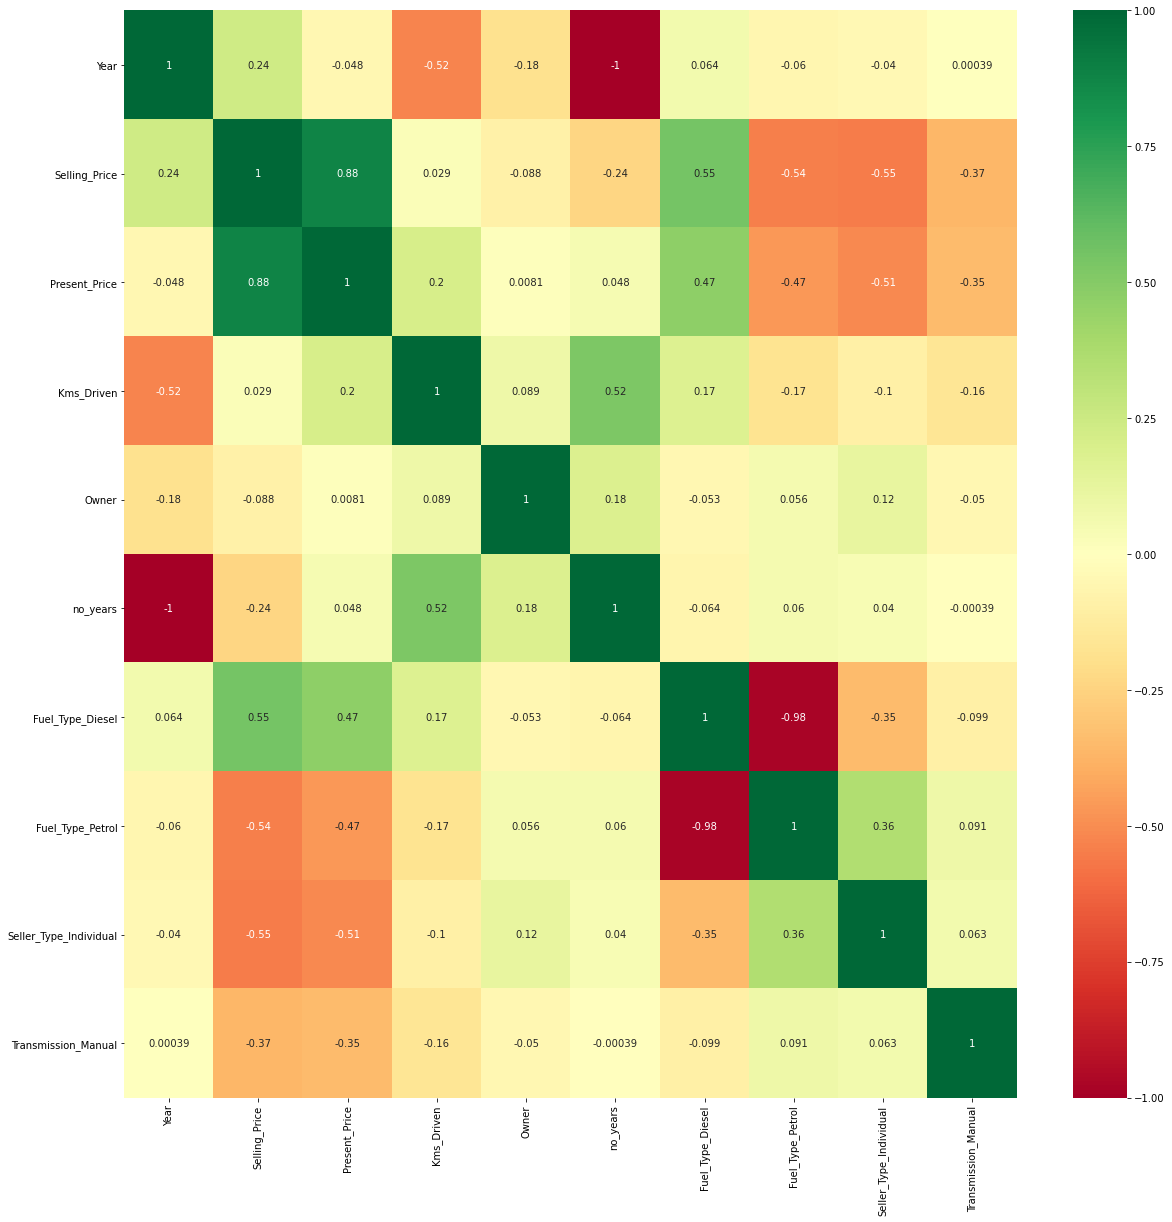

In [74]:
corrmat=final_dataset.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
#plotting the heatmap
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")
#using heatmap we can visualize the relation between the features

In [92]:
X=final_dataset.iloc[:,1:] #independent features 
y=final_dataset.iloc[:,0]  #dependent feature i.e selling price is to be our predicted feature

In [93]:
 X.head()

,Present_Price,Kms_Driven,Owner,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [94]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [97]:
#feature importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()                       
model.fit(X,y)

ExtraTreesRegressor()

In [101]:
print(model.feature_importances_) #printing the important features from dataset 
#here first feature has higher importance and 5th feature has second highest importance and so on

[0.35687031 0.0423335  0.00064162 0.07566238 0.23507786 0.00814582
 0.1362771  0.14499141]


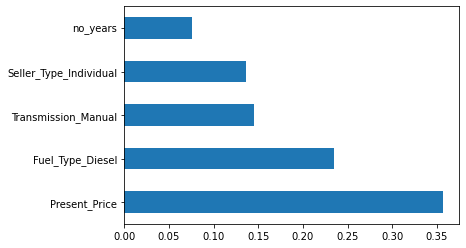

In [104]:
#plotting feature imps using matplotlib for better visualization
feat_imp=pd.Series(model.feature_importances_,index=X.columns)
feat_imp.nlargest(5).plot(kind="barh")
plt.show()

In [106]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [109]:
X_train

,Present_Price,Kms_Driven,Owner,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
184,0.750,26000,1,13,0,1,1,1
132,0.950,3500,0,4,0,1,1,1
194,0.787,50000,0,13,0,1,1,1
75,6.800,36000,0,6,0,1,0,1
111,1.500,8700,0,5,0,1,1,1
...,...,...,...,...,...,...,...,...
188,0.570,18000,0,8,0,1,1,1
71,12.480,45000,0,10,1,0,0,1
106,3.450,16500,1,7,0,1,1,1
270,10.000,69341,0,10,0,1,0,1


In [111]:
X_train.shape

(240, 8)

In [113]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [119]:
#hyperparameter tuning i.e implementing parameters of randomforest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [125]:
from sklearn.model_selection import RandomizedSearchCV #randomizessearchcv will find the  imp hyperparameter 
#it is faster than grid searchcv

In [118]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [123]:
# Create the random grid #we have tuned all the parameters
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid) 

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [128]:
#first create the base modelto tune
rf=RandomForestRegressor()


In [132]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
#cv=cross validation,verbose=output displayin,n_jobs is nothing but cores to be used if we select 1 then al cores in system will be utilized

In [135]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [136]:
predictions=rf_random.predict(X_test)

In [137]:
predictions


array([ 0.82394,  9.95979,  5.32403,  0.33509,  6.96094,  6.3548 ,
        0.9829 ,  0.62614,  0.50784,  6.2334 , 11.03789,  0.88745,
        7.34327,  0.61256,  5.39905,  3.02129,  0.97474, 11.15773,
        0.65023,  1.44513,  0.52726,  8.71953,  5.97052,  2.7433 ,
        0.53368,  3.5984 ,  5.2722 ,  3.17215,  1.185  ,  1.09309,
        0.64644,  9.72331,  0.45188,  2.60597,  8.00308,  4.11165,
        6.08985,  4.94835,  3.13718,  5.4002 ,  3.98611,  4.0728 ,
        4.8327 ,  0.5628 ,  7.12328,  0.55683,  7.22185,  6.24122,
        3.1245 ,  3.7337 ,  5.42805,  1.38471, 20.76027, 21.27304,
        6.78175,  8.53679,  5.17117,  9.60674,  2.57759,  7.17997,
        0.2995 ])

<AxesSubplot:xlabel='Selling_Price', ylabel='Count'>

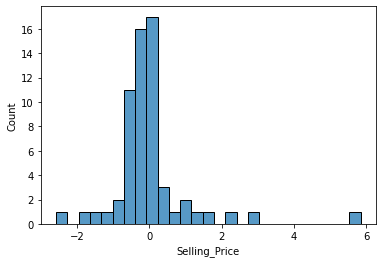

In [139]:
sns.histplot(y_test-predictions)

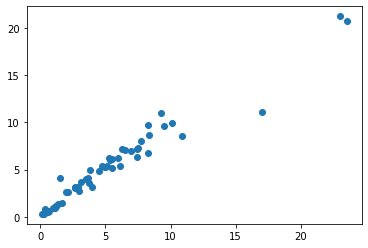

In [140]:
plt.scatter(y_test,predictions)

In [152]:
import pickle
#open a file ,where you want to store the data
file=open("random_forest_regression_mdl.pkl","wb")
#dump information to that file
pickle.dump(rf_random,file)